In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter   

In [2]:
! head MovieTweetings-master/latest/ratings.dat 

1::0114508::8::1381006850
2::0075314::1::1595468524
2::0102926::9::1590148016
2::0114369::10::1597555347
2::0118715::8::1596006798
2::0120737::8::1599306720
2::0208092::5::1586466072
2::0358273::9::1579057827
2::0477348::6::1597289003
2::10039344::5::1578603053


In [3]:
# user_id::movie_id::rating::rating_timestamp. 
df = pd.read_csv("MovieTweetings-master/latest/ratings.dat", 
                 sep="::", engine="python",
                 names=["user_id", "movie_id", "rating", "rating_timestamp"] )

df['rating_timestamp'] = pd.to_datetime(df['rating_timestamp'], unit='s')
df

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,2013-10-05 21:00:50
1,2,75314,1,2020-07-23 01:42:04
2,2,102926,9,2020-05-22 11:46:56
3,2,114369,10,2020-08-16 05:22:27
4,2,118715,8,2020-07-29 07:13:18
...,...,...,...,...
888447,69322,9784456,6,2020-07-27 00:40:13
888448,69322,9898858,3,2020-04-04 00:00:52
888449,69323,172495,10,2020-04-17 07:03:35
888450,69323,414387,10,2020-04-17 07:17:32


### Answer the following questions.

a. How many users and movies are mentioned in the dataset?

b. How old are the data points (number of data points per year)

c. How popular are popular movies? Looking at the data, when will you say a movie is popular?

d. How many long-tail movies are there?

e. How many movies has each user rated?

f. If you had a recommender system that only recommends the most popular movies, how good would it be?

Write a report answering the questions above, with charts illustrating your answers.

## How many users and movies are mentioned in the dataset?

In [4]:
print(f"Number Users: {len(df['user_id'].unique()):,} number movies: {len(df['movie_id'].unique()):,} ")

Number Users: 69,324 number movies: 36,380 


## How old are the data points (number of data points per year)

In [5]:
df['year'] = pd.DatetimeIndex(df['rating_timestamp']).year 
counter = Counter(df['year'].tolist())
print("Year\tMovie Ratings")
for year, cnt in sorted(counter.items(), key=lambda x:x[0]):
    print(f"{year}\t{cnt:,}")

Year	Movie Ratings
2013	170,807
2014	156,354
2015	123,644
2016	112,455
2017	105,987
2018	81,870
2019	74,183
2020	63,152


## How popular are popular movies? Looking at the data, when will you say a movie is popular?

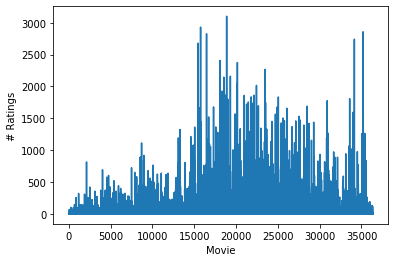

In [6]:
# df['movie_id'].plot.hist(bins=10)
counter = Counter(df['movie_id'].tolist())

# print("Movies\tRatings")
movies_ratings = sorted(counter.items(), key=lambda x:x[0])
movies, ratings = zip(* movies_ratings)
plt.xlabel('Movie')
plt.ylabel('# Ratings')
# plt.yscale('log')
plt.plot(range(len(movies)), ratings )
# for ratings, users in ratings_users:
#     print(f"{ratings:,}\t{users:,}")
# plt.hist(ratings, bins=20)  

## How many movies has each user rated?

Number of ratings	Users


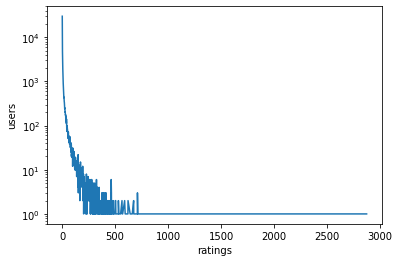

In [7]:
counter = Counter(df['user_id'].tolist())
ratings_counter = Counter(counter.values())
print("Number of ratings\tUsers")
ratings_users = sorted(ratings_counter.items(), key=lambda x:x[0])
# for ratings, users in ratings_users:
#     print(f"{ratings:,}\t{users:,}")

ratings, users = zip(* ratings_users)
plt.xlabel('ratings')
plt.ylabel('users')
plt.yscale('log')
plt.plot(ratings, users)

##  How many long-tail movies are there?

In [8]:
for i in range(1,10):
    print (f" {i}0 percentile of ratings: {np.percentile(ratings, i*10)}")

 10 percentile of ratings: 49.800000000000004
 20 percentile of ratings: 98.60000000000001
 30 percentile of ratings: 147.4
 40 percentile of ratings: 196.20000000000002
 50 percentile of ratings: 246.0
 60 percentile of ratings: 300.8
 70 percentile of ratings: 367.19999999999993
 80 percentile of ratings: 453.80000000000007
 90 percentile of ratings: 614.5999999999999


## If you had a recommender system that only recommends the most popular movies, how good would it be?

In [9]:
# Not good to rely on just popular movies